<a href="https://colab.research.google.com/github/sksusha8853/Mini-project/blob/main/Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
## Minor Project on Image classification
## Saurabh Kumar Singh
## cse200001071@iiti.ac.in 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np
from skimage.transform import resize
import os


In [13]:
#img=plt.imread('/content/drive/MyDrive/ball/download (1).jpg')
#plt.imshow(img)

In [14]:
#img.shape

In [15]:
datadir='/content/drive/MyDrive/mini project image'

In [16]:
categories=['bat','ball']

In [17]:
%%time
import cv2
target=[]
flat_data=[]
images=[]

for i in categories:
  class_n=categories.index(i)
  path =os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img))
    img_con=cv2.cvtColor(img_array,cv2.COLOR_BGR2GRAY)
    img_resize=cv2.resize(img_con,(150,150))
   # plt.imshow(img_resize)
    #plt.show()
  
    flat_data.append(np.ndarray.flatten(img_resize))
    images.append(img_resize)
    target.append(class_n)

flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)


CPU times: user 162 ms, sys: 36.8 ms, total: 198 ms
Wall time: 26.8 s


In [18]:
len(flat_data[0])

22500

<BarContainer object of 2 artists>

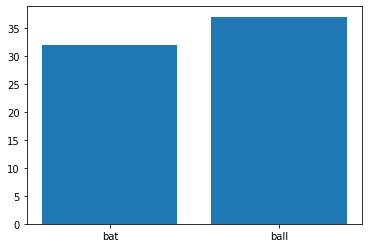

In [19]:
unique,count=np.unique(target,return_counts=True)
plt.bar(categories,count)

In [20]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [21]:
df=pd.DataFrame(flat_data)
df['Target']=target
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,22461,22462,22463,22464,22465,22466,22467,22468,22469,22470,22471,22472,22473,22474,22475,22476,22477,22478,22479,22480,22481,22482,22483,22484,22485,22486,22487,22488,22489,22490,22491,22492,22493,22494,22495,22496,22497,22498,22499,Target
64,4,4,4,4,3,3,3,3,4,4,5,8,6,5,6,5,7,12,12,16,16,7,11,67,45,6,3,21,16,2,4,41,10,12,10,7,28,14,11,13,...,14,3,6,23,14,2,10,4,9,4,8,17,18,28,10,1,5,4,12,9,31,42,44,45,183,194,202,212,219,222,222,217,208,184,138,29,24,24,29,1
65,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1
66,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1
67,195,196,196,197,197,198,199,199,200,201,201,202,203,204,206,206,208,208,208,209,210,210,210,211,211,212,212,214,214,214,215,215,216,217,217,218,219,219,219,219,...,63,65,68,73,81,91,99,108,117,124,134,142,149,152,153,155,156,157,158,159,158,158,157,156,156,156,155,154,153,152,152,151,151,150,150,149,147,145,143,1
68,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1


In [22]:
#opencv BGR2GRAY
#skimage= rgb2gray

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=109)


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            
               { 'C':[1,10,100,1000],'kernel':['linear']},
             {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
            
]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)



GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [25]:
y_pred=clf.predict(x_test)
y_pred


array([1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [26]:
y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0])

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [28]:
accuracy_score(y_pred,y_test)

0.8571428571428571

In [31]:
confusion_matrix(y_pred,y_test)

array([[11,  3],
       [ 0,  7]])

In [33]:

import pickle
pickle.dump(clf,open('img_model.p','wb'))
model=pickle.load(open('img_model.p','rb'))

In [ ]:
"""flat_data=[]
url=input('Enter the url of image')
img=cv2.imread(url)
img_con=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_resize=cv2.resize(img_con,(150,150))
flat_data.append(img_resize,flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resize)
y_out=model.predict(flat_data)
y_out=categories[y_out[0]]
print(f'Predicted Output:{y_out}')"""


In [ ]:
#   https://en.m.wikipedia.org/wiki/File:Soccer_ball_patch.jpg  

In [ ]:
!wget https://en.wikipedia.org/wiki/Golf_ball#/media/File:Golfball.jpg

In [ ]:
# https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQV9qZCyT26KSNEPHWZTW7CnvPYfnP8Tmv63Q&usqp=CAU
# 

(183, 275, 3)
Predicted Output:ball


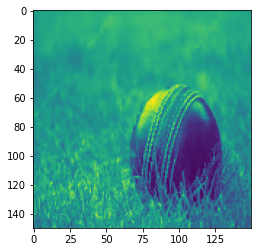

In [43]:
import keras
import pickle
pickle.dump(clf,open('img_model.p','wb'))
model=pickle.load(open('img_model.p','rb'))

from google.colab.patches import cv2_imshow
from skimage import io
flat_data=[]
#url=input('Enter the url of image')


#img=cv2.imread(url,cv2.IMREAD_UNCHANGED)

#print(img.shape)

img=imread('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQV9qZCyT26KSNEPHWZTW7CnvPYfnP8Tmv63Q&usqp=CAU')
#plt.imshow(img)

img_con=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_resize=cv2.resize(img_con,(150,150))
flat_data.append(img_resize.flatten())

flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resize)
y_out=model.predict(flat_data)
y_out=categories[y_out[0]]
print(f'Predicted Output:{y_out}')
